<a href="https://colab.research.google.com/github/shivanshr58/Deep-Learning-Guided-Project/blob/main/deep_learning_guided_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village


 94% 310M/329M [00:02<00:00, 112MB/s] 
100% 329M/329M [00:02<00:00, 121MB/s]


In [ ]:
!unzip /content/plant-village.zip PlantVillage/Potato___Early_blight/* PlantVillage/Potato___Late_blight/* PlantVillage/Potato___healthy/* -d /content/final_data

Archive:  /content/plant-village.zip
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: /content/final_data/PlantVillage/Potato___Early

In [ ]:
user = "shivanshr12"
key = "9568033458aaf84f6ed6c836ce0df873"

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/final_data/PlantVillage',
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)


Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

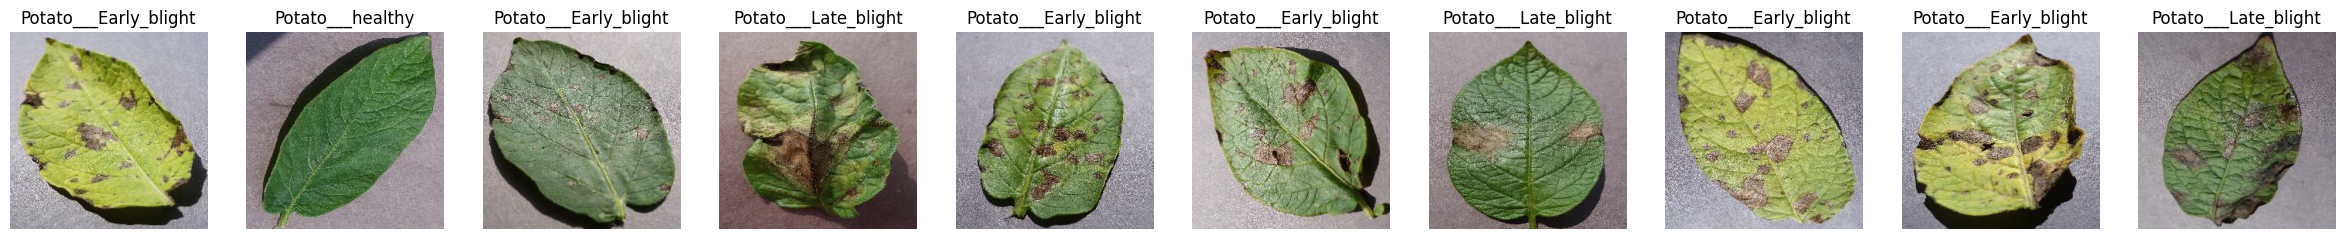

In [ ]:
for images,labels in dataset.take(1):
  fig,ax = plt.subplots(1,10,figsize = (30,10))
  for i in range(10):
    ax[i].set_title(class_names[labels[i]])
    ax[i].imshow(images[i].numpy().astype('uint8'))
    ax[i].axis("off")

# Train test split
*   80 % for train
*   10 % for validation and 10 % for test



In [ ]:
train_size = round(0.8 * len(dataset))   # 80 % of total number of batches
val_size = round(0.1 * len(dataset))    # 10 % of
train = dataset.take(train_size)         #train data set
data_for_test = dataset.skip(train_size)
val = data_for_test.take(val_size)      # validation data set
test = data_for_test.skip(val_size)     # test data set

In [ ]:
len(train)

54

In [ ]:
len(test)

7

In [ ]:
def train_test_split(data,train_pc = 0.8,val_pc = 0.1,shuffle = True, shuffle_size = 1000):
  if shuffle:
    dat = data.shuffle(shuffle_size, seed = 12)
  train_size = round(train_pc * len(data))   # 80 % of total number of batches
  val_size = round(val_pc * len(data))    # 10 % of
  train = data.take(train_size)         #train data set
  data_for_test = data.skip(train_size)
  val = data_for_test.take(val_size)      # validation data set
  test = data_for_test.skip(val_size)     # test data set
  return train,val,test

In [ ]:
train,val,test = train_test_split(dataset)

In [ ]:
# caching,shuffling and prefetch to improve model performance

train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
for image_batch,label_batch in train.take(1).as_numpy_iterator():
  print(image_batch.shape)

(32, 256, 256, 3)


In [ ]:
input_shape = (32, 256, 256, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train,
    batch_size=input_shape[0],
    validation_data=val,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 13s 95ms/step - loss: 0.8857 - accuracy: 0.5312 - val_loss: 0.7697 - val_accuracy: 0.5848
Epoch 2/50
54/54 [==============================] - 3s 58ms/step - loss: 0.5931 - accuracy: 0.7332 - val_loss: 0.4324 - val_accuracy: 0.7946
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3816 - accuracy: 0.8368 - val_loss: 0.3559 - val_accuracy: 0.8661
Epoch 4/50
54/54 [==============================] - 3s 59ms/step - loss: 0.3146 - accuracy: 0.8791 - val_loss: 0.2298 - val_accuracy: 0.8973
Epoch 5/50
54/54 [==============================] - 3s 58ms/step - loss: 0.2169 - accuracy: 0.9126 - val_loss: 0.1881 - val_accuracy: 0.9107
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.1915 - accuracy: 0.9219 - val_loss: 0.1310 - val_accuracy: 0.9464
Epoch 7/50
54/54 [==============================] - 3s 59ms/step - loss: 0.2126 - accuracy: 0.9138 - val_loss: 0.2857 - val_accuracy: 0.8705
Epoch 8/50
5

In [ ]:
model.evaluate(test)

7/7 [==============================] - 2s 88ms/step - loss: 0.0429 - accuracy: 0.9800


[0.042891908437013626, 0.9800000190734863]

1/1 [==============================] - 0s 28ms/step


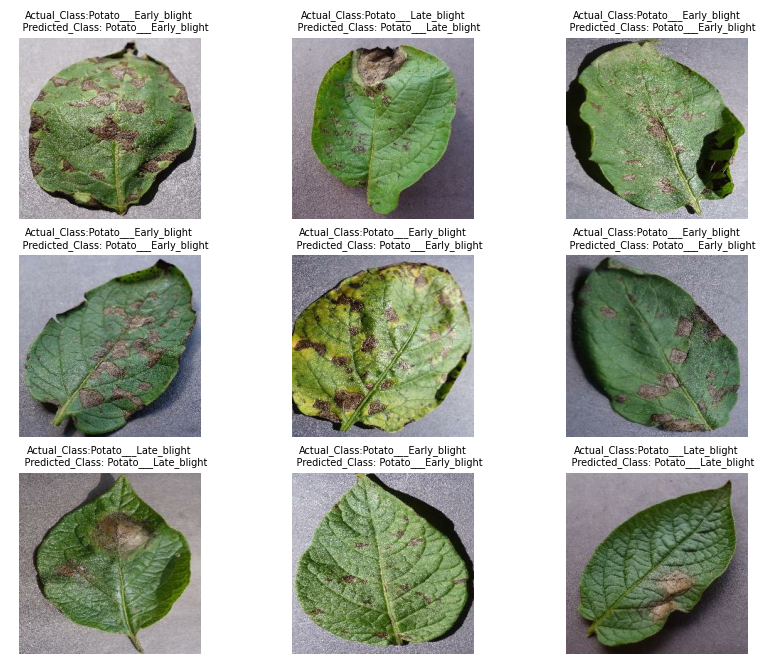

In [ ]:
n=9
for image_batch,label_batch in test.take(1):
  plt.figure(figsize=(10,8))
  for i in range(n):
    ax = plt.subplot(3,3,i+1)
    batch_pred = model.predict(image_batch)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(f"""Actual_Class:{class_names[label_batch.numpy()[i]]}
    Predicted_Class: {class_names[np.argmax(batch_pred[i])]}""",fontdict = {'fontsize' : 7})

In [ ]:
model.save("/content/Models/M1/")

In [ ]:
!zip -r /content/Models.zip /content/Models


  adding: content/Models/ (stored 0%)
  adding: content/Models/M1/ (stored 0%)
  adding: content/Models/M1/variables/ (stored 0%)
  adding: content/Models/M1/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/Models/M1/variables/variables.index (deflated 68%)
  adding: content/Models/M1/fingerprint.pb (stored 0%)
  adding: content/Models/M1/keras_metadata.pb (deflated 94%)
  adding: content/Models/M1/saved_model.pb (deflated 89%)
  adding: content/Models/M1/assets/ (stored 0%)


In [ ]:
m1 = tf.keras.models.load_model("/content/Models/M1")

In [ ]:
for i in test.take(1).as_numpy_iterator():
  print(i[0][0].shape)

(256, 256, 3)


In [ ]:
pred = model.predict(test.take(1))

1/1 [==============================] - 0s 201ms/step


In [ ]:
pred[0]

array([8.79435756e-05, 9.99911904e-01, 1.01619136e-07], dtype=float32)

In [ ]:
np.max(pred[0])

0.9999119